In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
pip uninstall tensorflow

Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Would remove:
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.11/dist-packages/tensorflow-2.18.0.dist-info/*
    /usr/local/lib/python3.11/dist-packages/tensorflow/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.11/dist-packages/tensorflow/include/external/com_google_highway/hwy/aligned_allocator.h
    /usr/local/lib/python3.11/dist-packages/tensorflow/include/external/com_google_highway/hwy/base.h
    /usr/local/lib/python3.11/dist-packages/tensorflow/include/external/com_google_highway/hwy/cache_control.h
    /usr/local/lib/python3.11/dist-packages/tensorflow/include/external/com_google_highway/hwy/contrib/algo/copy-inl.h
    /usr/local/lib/python3.11/dist-packages/

In [8]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 1.7 MB/s eta 0:00:00


In [2]:
!pip install gdown  # If not installed

## vgg16
!gdown --id 1DXY3Ivz-QeeiaXrfgyaJTPnokqlznetA -O vgg16_model.h5
# https://drive.google.com/file/d/1DXY3Ivz-QeeiaXrfgyaJTPnokqlznetA/view?usp=sharing

## inception
!gdown --id 1AlkIThP1sk6RVireJqhcQMNNWp5vQVOs -O inception_model.h5
# https://drive.google.com/file/d/1AlkIThP1sk6RVireJqhcQMNNWp5vQVOs/view?usp=sharing

## densenet
!gdown --id 1qj92KOG9wKwbmtPl5bhOFrzliVySAOPc -O densenet_model.h5
# https://drive.google.com/file/d/1qj92KOG9wKwbmtPl5bhOFrzliVySAOPc/view?usp=sharing

## bagging model
!gdown --id 16y-fJ-O4fTAsrLT-vCGQ0pp59pA-QmFS -O potato_bagging_model.h5
# https://drive.google.com/file/d/16y-fJ-O4fTAsrLT-vCGQ0pp59pA-QmFS/view?usp=sharing

## dataset
!gdown --id 1kt1WIiNNSQnWAiQEURhbdXHRYxlo3kP6 -O potato_dataset.npz
# https://drive.google.com/file/d/1kt1WIiNNSQnWAiQEURhbdXHRYxlo3kP6/view?usp=sharing

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1DXY3Ivz-QeeiaXrfgyaJTPnokqlznetA
From (redirected): https://drive.google.com/uc?id=1DXY3Ivz-QeeiaXrfgyaJTPnokqlznetA&confirm=t&uuid=8d20928c-a564-478a-9bbc-7d5a54db8da1
To: /content/vgg16_model.h5
100% 121M/121M [00:01<00:00, 70.6MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1AlkIThP1sk6RVireJqhcQMNNWp5vQVOs
From (redirected): https://drive.google.com/uc?id=1AlkIThP1sk6RVireJqhcQMNNWp5vQVOs&confirm=t&uuid=e83f2afd-72be-4bde-980f-8c60ff73d890
To: /content/inception_mo

In [1]:
from tensorflow.keras.models import load_model

# Load your trained models
vgg16_model = load_model('vgg16_model.h5')
inception_model = load_model('inception_model.h5')
densenet_model = load_model('densenet_model.h5')
potato_bagging_model = load_model('potato_bagging_model.h5')

# Check if models are loaded correctly
print(vgg16_model.summary())
print(inception_model.summary())
print(densenet_model.summary())
print(potato_bagging_model.summary())


Model: "VGG16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 8, 8, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,788,805 (56.41 MB)

 Trainable params: 7,709,379 (29.41 MB)

 Non-trainable params: 7,079,424 (27.01 MB)

 Optimizer params: 2 (12.00 B)

None


Model: "InceptionV3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ inception_v3 (Functional)            │ (None, 6, 6, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,073,509 (84.20 MB)

 Trainable params: 21,645,347 (82.57 MB)

 Non-trainable params: 428,160 (1.63 MB)

 Optimizer params: 2 (12.00 B)

None


Model: "DenseNet121"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ densenet121 (Functional)             │ (None, 8, 8, 1024)          │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,177,157 (27.38 MB)

 Trainable params: 6,888,515 (26.28 MB)

 Non-trainable params: 288,640 (1.10 MB)

 Optimizer params: 2 (12.00 B)

None


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ VGG16 (Functional)        │ (None, 3)              │     14,788,803 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ InceptionV3 (Functional)  │ (None, 3)              │     22,073,507 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ DenseNet121 (Functional)  │ (None, 3)              │      7,177,155 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ average (Average)         │ (None, 3)              │              0 │ VGG16[0][0],           │
│                           │                        │                │ InceptionV3[0][0],     │
│                           │                        │                │ DenseNet121[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 44,039,467 (168.00 MB)

 Trainable params: 36,243,241 (138.26 MB)

 Non-trainable params: 7,796,224 (29.74 MB)

 Optimizer params: 2 (12.00 B)

None


In [2]:
import numpy as np
data = np.load("/content/potato_dataset.npz")

x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

In [3]:
from sklearn.metrics import accuracy_score, recall_score

def evaluate_model(model, x_test, y_test):
    # Predict probabilities
    y_pred_prob = model.predict(x_test)
    # Convert probabilities to class labels
    y_pred = y_pred_prob.argmax(axis=1)
    y_true = y_test.argmax(axis=1)
    # Calculate accuracy and recall
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred, average='macro')  # 'macro' for unweighted average across classes
    return accuracy, recall


In [4]:
# Evaluate VGG16
vgg16_accuracy, vgg16_recall = evaluate_model(vgg16_model, x_test, y_test)
# Evaluate InceptionV3
inception_accuracy, inception_recall = evaluate_model(inception_model, x_test, y_test)
# Evaluate DenseNet121
densenet_accuracy, densenet_recall = evaluate_model(densenet_model, x_test, y_test)
# Evaluate Bagging Ensemble
bagging_accuracy, bagging_recall = evaluate_model(potato_bagging_model, x_test, y_test)


31/31 ━━━━━━━━━━━━━━━━━━━━ 275s 9s/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 132s 4s/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 259s 8s/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 626s 20s/step


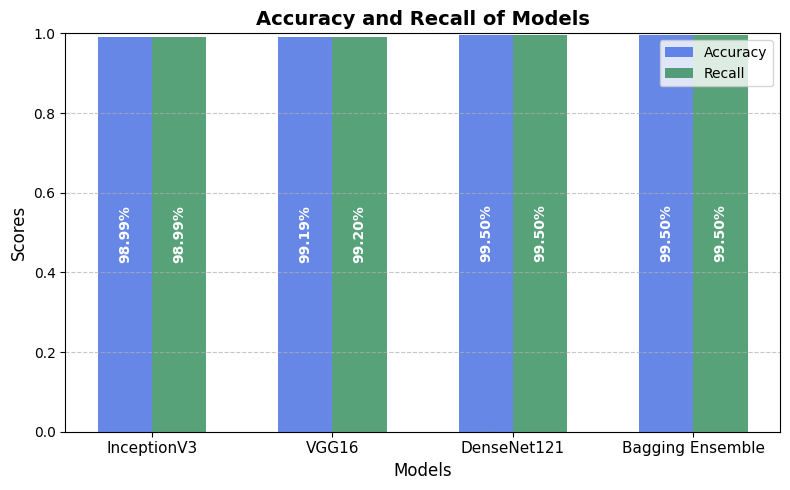

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their corresponding metrics
models = ['VGG16', 'InceptionV3', 'DenseNet121', 'Bagging Ensemble']
accuracies = [vgg16_accuracy, inception_accuracy, densenet_accuracy, bagging_accuracy]
recalls = [vgg16_recall, inception_recall, densenet_recall, bagging_recall]

# Sorting models by accuracy for better visualization
sorted_indices = np.argsort(accuracies)  # Sort based on accuracy
models = [models[i] for i in sorted_indices]
accuracies = [accuracies[i] for i in sorted_indices]
recalls = [recalls[i] for i in sorted_indices]

x = np.arange(len(models))  # Label positions
width = 0.3  # Reduce bar width for better visibility

fig, ax = plt.subplots(figsize=(8, 5))  # Compact figure size

# Plot bars
bars1 = ax.bar(x - width/2, accuracies, width, label='Accuracy', color='royalblue', alpha=0.8)
bars2 = ax.bar(x + width/2, recalls, width, label='Recall', color='seagreen', alpha=0.8)

# Add vertical labels inside bars
def attach_labels_vertical(bars, color='white'):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2%}',  # Convert decimal to percentage
                    xy=(bar.get_x() + bar.get_width() / 2, height / 2),  # Place inside the bar
                    rotation=90,  # Rotate text vertically
                    ha='center', va='center', fontsize=10, fontweight='bold', color=color)

attach_labels_vertical(bars1)
attach_labels_vertical(bars2)

# Set labels and title
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Accuracy and Recall of Models', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=11)
ax.legend()

plt.ylim(0, 1)  # Keep y-axis within [0,1]
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines

plt.tight_layout()
plt.show()


In [6]:
print("VGG16 Model")
print("Accuracy :",vgg16_accuracy)
print("Recall :",vgg16_recall)

print("Inception Model")
print("Accuracy :",inception_accuracy)
print("Recall :",inception_recall)

print("Densenet Model")
print("Accuracy :",densenet_accuracy)
print("Recall :",densenet_recall)

print("Bagging Model")
print("Accuracy :",bagging_accuracy)
print("Recall :",bagging_recall)

VGG16 Model
Accuracy : 0.9919273461150353
Recall : 0.9919556273875991
Inception Model
Accuracy : 0.9899091826437941
Recall : 0.9899108629640514
Densenet Model
Accuracy : 0.9949545913218971
Recall : 0.9949799196787149
Bagging Model
Accuracy : 0.9949545913218971
Recall : 0.9949799196787149


31/31 ━━━━━━━━━━━━━━━━━━━━ 277s 9s/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 128s 4s/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 251s 8s/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 600s 19s/step


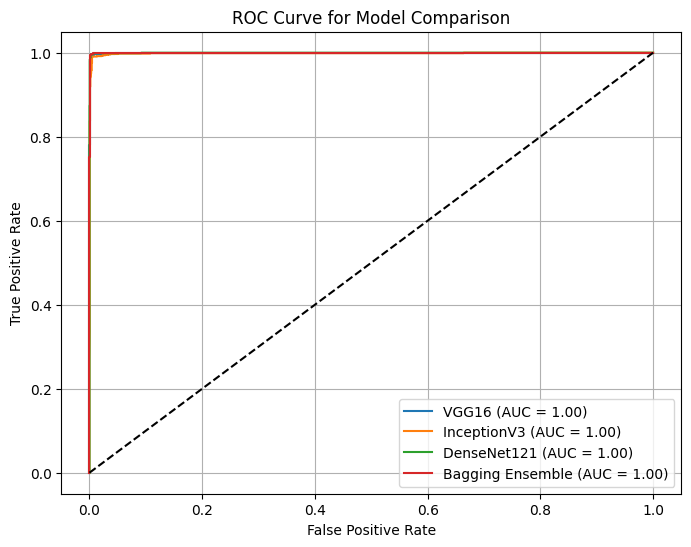

In [10]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

models = {
    "VGG16": vgg16_model,
    "InceptionV3": inception_model,
    "DenseNet121": densenet_model,
    "Bagging Ensemble": potato_bagging_model
}

for model_name, model in models.items():
    y_probs = model.predict(x_test)  # Get probabilities
    fpr, tpr, _ = roc_curve(y_test.ravel(), y_probs.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Model Comparison")
plt.legend(loc="lower right")
plt.grid()
plt.show()
